# Trend Line method for forecasting


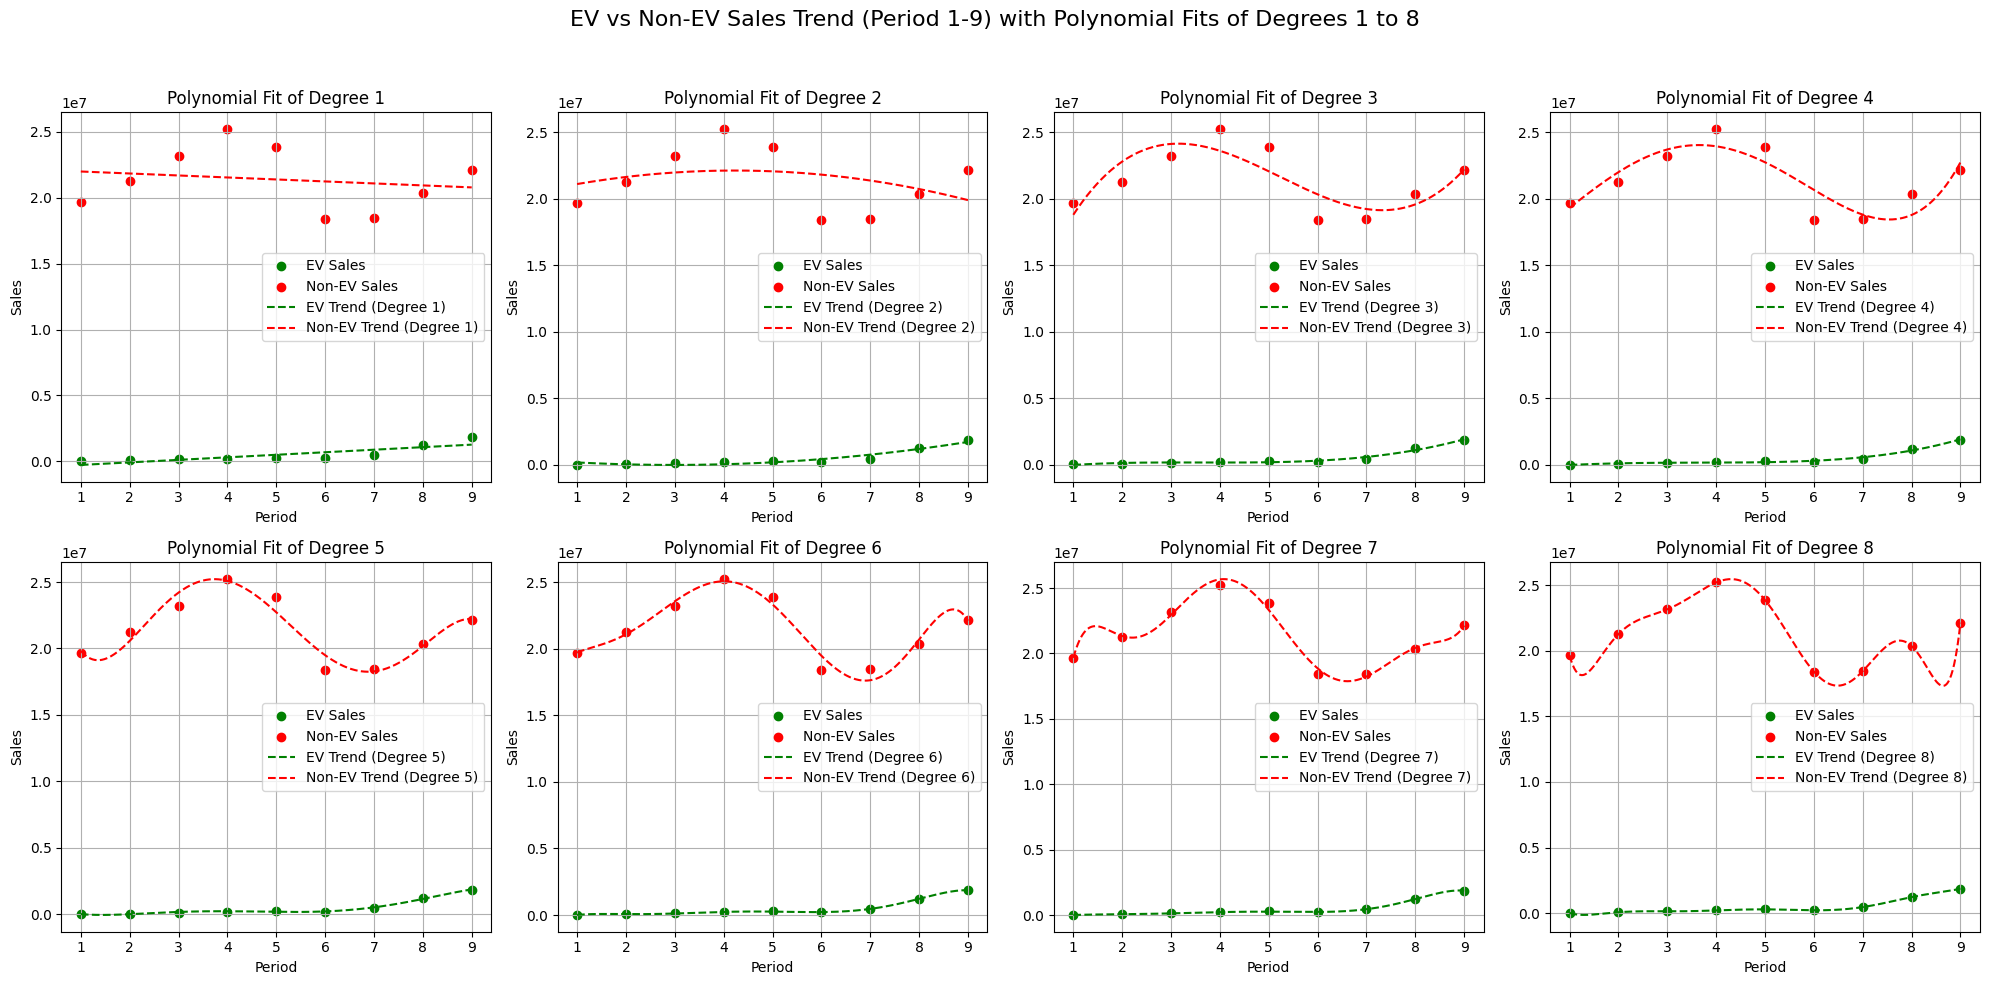

In [2]:
import numpy as np
import matplotlib.pyplot as plt

period = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
ev_sales = np.array([1866322, 1218331, 457574, 213951, 282274, 201546, 136579, 61707, 8390])
non_ev_sales = np.array([22142490, 20361312, 18454751, 18417887, 23872599, 25217424, 23166477, 21270404, 19667936])


fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('EV vs Non-EV Sales Trend (Period 1-9) with Polynomial Fits of Degrees 1 to 8', fontsize=16)


for i, degree in enumerate(range(1, 9)):
    ev_fit = np.poly1d(np.polyfit(period, ev_sales, degree))
    non_ev_fit = np.poly1d(np.polyfit(period, non_ev_sales, degree))
    ax = axes[i // 4, i % 4]

    ax.scatter(period, ev_sales, color='green', label='EV Sales')
    ax.scatter(period, non_ev_sales, color='red', label='Non-EV Sales')

    period_range = np.linspace(1, 9, 500)
    ax.plot(period_range, ev_fit(period_range), color='green', linestyle='--', label=f'EV Trend (Degree {degree})')
    ax.plot(period_range, non_ev_fit(period_range), color='red', linestyle='--', label=f'Non-EV Trend (Degree {degree})')

    ax.set_xlabel('Period')
    ax.set_ylabel('Sales')
    ax.set_title(f'Polynomial Fit of Degree {degree}')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [3]:
from sklearn.metrics import r2_score

r2_ev = []
r2_non_ev = []

for degree in range(1, 9):
    ev_fit = np.poly1d(np.polyfit(period, ev_sales, degree))
    non_ev_fit = np.poly1d(np.polyfit(period, non_ev_sales, degree))

    ev_predicted = ev_fit(period)
    non_ev_predicted = non_ev_fit(period)

    r2_ev.append(r2_score(ev_sales, ev_predicted))
    r2_non_ev.append(r2_score(non_ev_sales, non_ev_predicted))

for degree in range(1, 9):
    print(f"Degree {degree} Polynomial:")
    print(f"  R² for EV Sales: {r2_ev[degree-1]:.4f}")
    print(f"  R² for Non-EV Sales: {r2_non_ev[degree-1]:.4f}")


Degree 1 Polynomial:
  R² for EV Sales: 0.7024
  R² for Non-EV Sales: 0.0297
Degree 2 Polynomial:
  R² for EV Sales: 0.9228
  R² for Non-EV Sales: 0.0933
Degree 3 Polynomial:
  R² for EV Sales: 0.9820
  R² for Non-EV Sales: 0.6797
Degree 4 Polynomial:
  R² for EV Sales: 0.9824
  R² for Non-EV Sales: 0.7419
Degree 5 Polynomial:
  R² for EV Sales: 0.9927
  R² for Non-EV Sales: 0.9098
Degree 6 Polynomial:
  R² for EV Sales: 0.9992
  R² for Non-EV Sales: 0.9476
Degree 7 Polynomial:
  R² for EV Sales: 0.9994
  R² for Non-EV Sales: 0.9826
Degree 8 Polynomial:
  R² for EV Sales: 1.0000
  R² for Non-EV Sales: 1.0000


# From the above R^2 metric we can say that the best trend line that fits the data is the one with degree 3 & 4

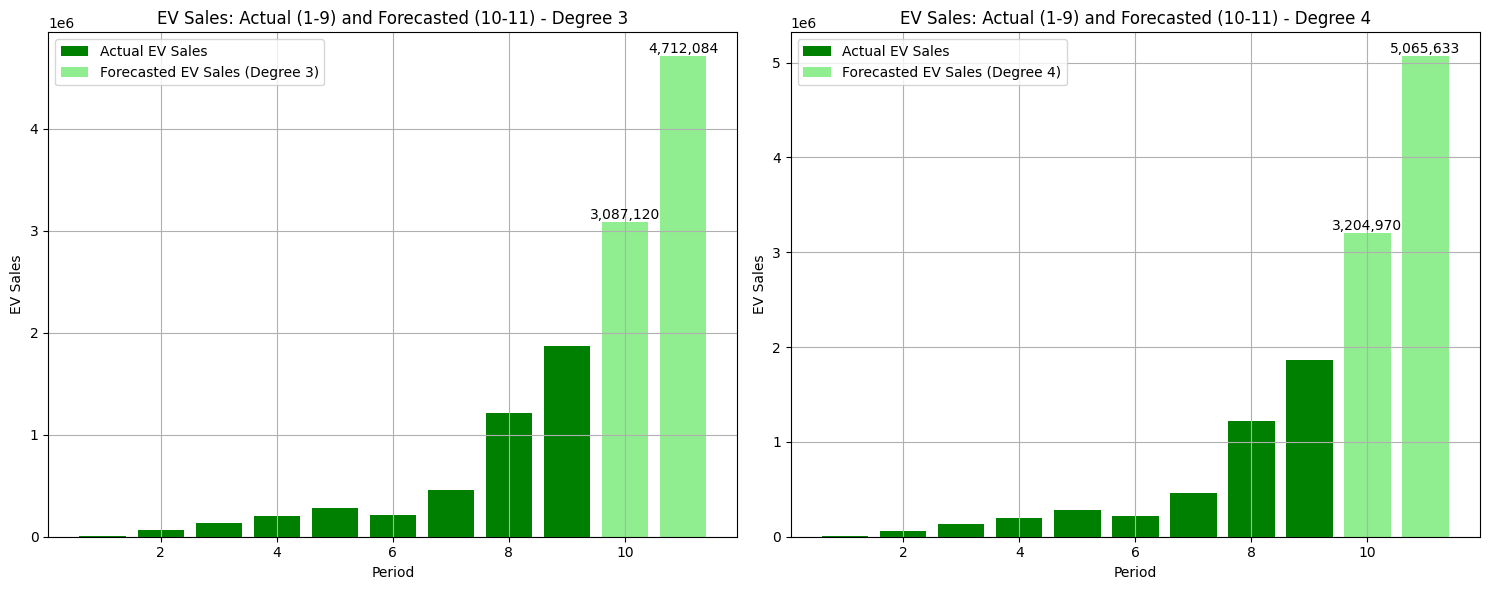

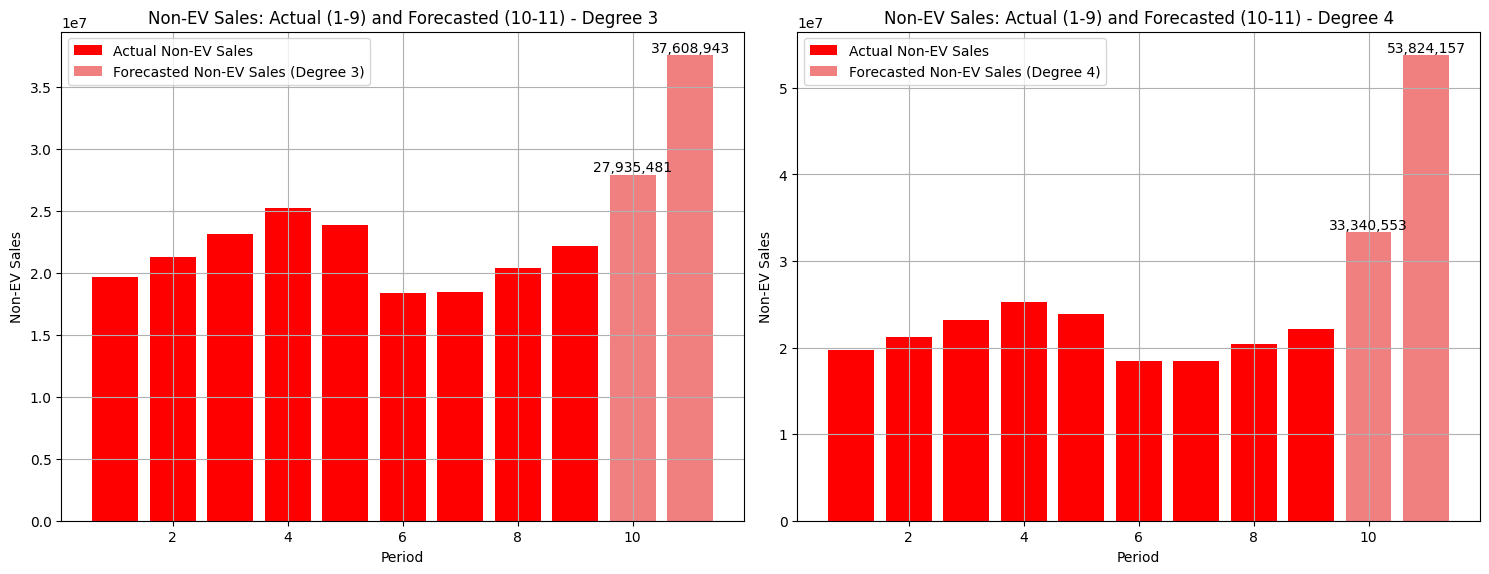

In [4]:
ev_fit_3 = np.poly1d(np.polyfit(period, ev_sales, 3))
non_ev_fit_3 = np.poly1d(np.polyfit(period, non_ev_sales, 3))
ev_fit_4 = np.poly1d(np.polyfit(period, ev_sales, 4))
non_ev_fit_4 = np.poly1d(np.polyfit(period, non_ev_sales, 4))

period_forecast = np.array([10, 11])
ev_sales_forecast_3 = ev_fit_3(period_forecast)
non_ev_sales_forecast_3 = non_ev_fit_3(period_forecast)
ev_sales_forecast_4 = ev_fit_4(period_forecast)
non_ev_sales_forecast_4 = non_ev_fit_4(period_forecast)

period_combined = np.concatenate([period, period_forecast])
ev_sales_combined_3 = np.concatenate([ev_sales, ev_sales_forecast_3])
non_ev_sales_combined_3 = np.concatenate([non_ev_sales, non_ev_sales_forecast_3])
ev_sales_combined_4 = np.concatenate([ev_sales, ev_sales_forecast_4])
non_ev_sales_combined_4 = np.concatenate([non_ev_sales, non_ev_sales_forecast_4])

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(period, ev_sales, color='green', label='Actual EV Sales')
bars_ev_3 = plt.bar(period_forecast, ev_sales_forecast_3, color='lightgreen', label='Forecasted EV Sales (Degree 3)')

for bar in bars_ev_3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.xlabel('Period')
plt.ylabel('EV Sales')
plt.title('EV Sales: Actual (1-9) and Forecasted (10-11) - Degree 3')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(period, ev_sales, color='green', label='Actual EV Sales')
bars_ev_4 = plt.bar(period_forecast, ev_sales_forecast_4, color='lightgreen', label='Forecasted EV Sales (Degree 4)')

for bar in bars_ev_4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.xlabel('Period')
plt.ylabel('EV Sales')
plt.title('EV Sales: Actual (1-9) and Forecasted (10-11) - Degree 4')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(period, non_ev_sales, color='red', label='Actual Non-EV Sales')
bars_non_ev_3 = plt.bar(period_forecast, non_ev_sales_forecast_3, color='lightcoral', label='Forecasted Non-EV Sales (Degree 3)')

for bar in bars_non_ev_3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.xlabel('Period')
plt.ylabel('Non-EV Sales')
plt.title('Non-EV Sales: Actual (1-9) and Forecasted (10-11) - Degree 3')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(period, non_ev_sales, color='red', label='Actual Non-EV Sales')
bars_non_ev_4 = plt.bar(period_forecast, non_ev_sales_forecast_4, color='lightcoral', label='Forecasted Non-EV Sales (Degree 4)')

for bar in bars_non_ev_4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.xlabel('Period')
plt.ylabel('Non-EV Sales')
plt.title('Non-EV Sales: Actual (1-9) and Forecasted (10-11) - Degree 4')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


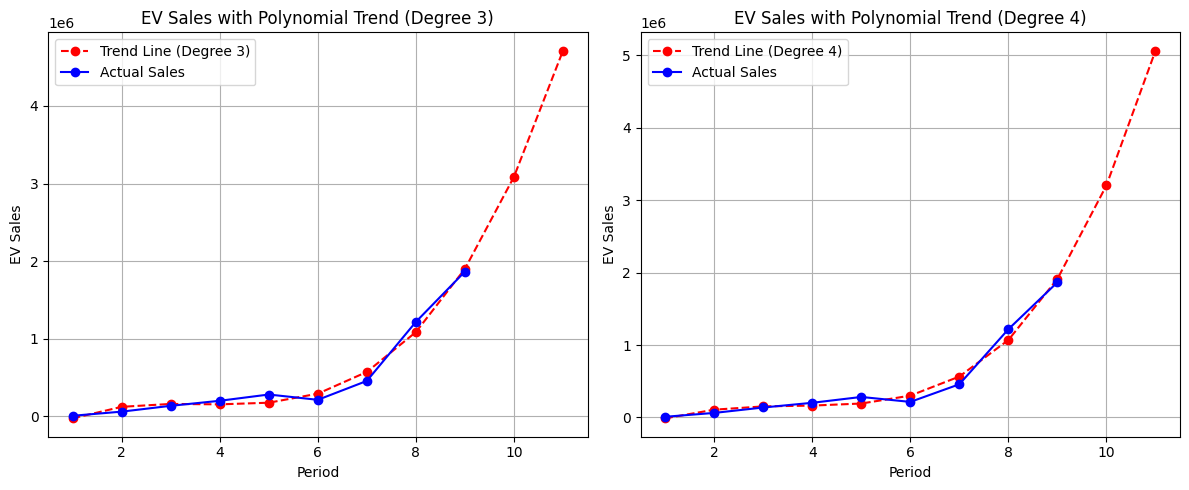

In [9]:
import numpy as np
import matplotlib.pyplot as plt

period = np.array([1,2,3,4,5,6,7,8,9])
ev_sales = np.array([8390, 61707, 136579, 201546, 282274, 213951, 457574, 1218331, 1866322])

ev_fit_3 = np.poly1d(np.polyfit(period, ev_sales, 3))
ev_fit_4 = np.poly1d(np.polyfit(period, ev_sales, 4))

period_forecast = np.array([10, 11])
period_combined = np.concatenate([period, period_forecast])

ev_sales_trend_3 = ev_fit_3(period_combined)
ev_sales_trend_4 = ev_fit_4(period_combined)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(period_combined, ev_sales_trend_3, marker='o', linestyle='--', color='red', label='Trend Line (Degree 3)')
plt.plot(period, ev_sales, marker='o', color='blue', label='Actual Sales')
plt.xlabel('Period')
plt.ylabel('EV Sales')
plt.title('EV Sales with Polynomial Trend (Degree 3)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(period_combined, ev_sales_trend_4, marker = 'o', linestyle='--', color='red', label='Trend Line (Degree 4)')
plt.plot(period, ev_sales, marker='o', color='blue', label='Actual Sales')
plt.xlabel('Period')
plt.ylabel('EV Sales')
plt.title('EV Sales with Polynomial Trend (Degree 4)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
